In [78]:
import pandas as pd
import numpy as np

In [14]:
dvos_data = pd.read_csv(f"md-2022-divorces-v1.csv", low_memory=False)
marr_data = pd.read_csv(f"md-2022-customary-marriages-v1.csv", low_memory=False)
cu_data = pd.read_csv(f"md-2022-civil-unions-v1.csv", low_memory=False)
cm_data = pd.read_csv(f"md-2022-civil-marriages-v1.csv", low_memory=False)

In [15]:
dvos_data.tail()

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,MarriagePropertySystem,MarriageMonth,MarriageYear,NoOfChildren,DivorceMonth,DivorceYear,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce
20191,Gauteng,Black African,Black African,Black African,Unspecified,Not economically active / Unemployed,Female,Unspecified,Never married,Unspecified,...,1. In community of property,6. June,2014,0,6. June,2022,8,1. Civil marriage,2. No,1. Adultery
20192,Free State,Unspecified,Black African,Unspecified,Unspecified,Unspecified,Female,Never married,Never married,1,...,1. In community of property,8. August,2009,0,10. October,2022,13,1. Civil marriage,2. No,9. Unspecified
20193,Gauteng,Black African,Unspecified,Unspecified,Managers and administrators,"Professional, semi-professional and technical ...",Female,Never married,Never married,1,...,2. Out of community of property,6. June,2018,0,8. August,2022,4,1. Civil marriage,2. No,9. Unspecified
20194,KwaZulu-Natal,Black African,Black African,Black African,Unspecified,Unspecified,Unspecified,Divorcee,Divorcee,2,...,3. Out of community of property (excluding acc...,4. April,2019,0,12. December,2022,3,9. Unspecified,2. No,4. Desertion
20195,Gauteng,Black African,Black African,Black African,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Both,Divorcee,Never married,4,...,4. Out of community of property (including acc...,7. July,2009,0,8. August,2022,13,1. Civil marriage,2. No,1. Adultery


In [16]:
dvos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProvinceCode            20196 non-null  object
 1   MaleRace                20196 non-null  object
 2   FemaleRace              20196 non-null  object
 3   CoupleRace              20196 non-null  object
 4   MaleOccupation          20196 non-null  object
 5   FemaleOccupation        20196 non-null  object
 6   PlaintiffSex            20196 non-null  object
 7   MaleStatus              20196 non-null  object
 8   FemaleStatus            20196 non-null  object
 9   MaleNoTimesMarried      20196 non-null  object
 10  FemaleNoTimesMarried    20196 non-null  object
 11  MaleAge                 20196 non-null  object
 12  FemaleAge               20196 non-null  object
 13  SolemnisationCode       20196 non-null  object
 14  MarriagePropertySystem  20196 non-null  object
 15  Ma

In [17]:
dvos_data.isnull().sum()

ProvinceCode              0
MaleRace                  0
FemaleRace                0
CoupleRace                0
MaleOccupation            0
FemaleOccupation          0
PlaintiffSex              0
MaleStatus                0
FemaleStatus              0
MaleNoTimesMarried        0
FemaleNoTimesMarried      0
MaleAge                   0
FemaleAge                 0
SolemnisationCode         0
MarriagePropertySystem    0
MarriageMonth             0
MarriageYear              0
NoOfChildren              0
DivorceMonth              0
DivorceYear               0
DurationOfMarriage        0
MarriageType              0
PolygamousMarriage        0
GroundsForDivorce         0
dtype: int64

# Fix Date
- we have 4 date columns, reduce to two
- use datetime format

In [25]:
dvos_data['MarriageMonth'].value_counts()

MarriageMonth
12. December       2646
11. November       1782
9. September       1772
10. October        1737
3. March           1661
4. April           1569
8. August          1426
2. February        1417
7. July            1379
5. May             1359
6. June            1299
1. January         1290
99. Unspecified     859
Name: count, dtype: int64

In [27]:
dvos_data['MarriageYear'].unique()

array([2006, 2021, 2008, 1989, 2020, 2019, 2022, 2009, 9999, 2016, 1999,
       2005, 2014, 2015, 1994, 1991, 2011, 1993, 2018, 2017, 2001, 2010,
       2013, 2012, 2007, 2002, 2004, 1987, 1985, 1988, 1995, 1984, 2003,
       1978, 1980, 2000, 1986, 1997, 1998, 1977, 1992, 1983, 1996, 1969,
       1982, 1958, 1990, 1972, 1970, 1976, 1971, 1967, 1968, 1952, 1981,
       1966, 1979, 1959, 1965, 1975, 1974, 1956, 1973])

In [29]:
dvos_data['MarriageDate'] = pd.to_datetime((dvos_data['MarriageMonth'] + ' ' + dvos_data['MarriageYear'].astype(str)), errors='coerce')
dvos_data.columns

Index(['ProvinceCode', 'MaleRace', 'FemaleRace', 'CoupleRace',
       'MaleOccupation', 'FemaleOccupation', 'PlaintiffSex', 'MaleStatus',
       'FemaleStatus', 'MaleNoTimesMarried', 'FemaleNoTimesMarried', 'MaleAge',
       'FemaleAge', 'SolemnisationCode', 'MarriagePropertySystem',
       'MarriageMonth', 'MarriageYear', 'NoOfChildren', 'DivorceMonth',
       'DivorceYear', 'DurationOfMarriage', 'MarriageType',
       'PolygamousMarriage', 'GroundsForDivorce', 'MarriageDate'],
      dtype='object')

In [30]:
dvos_data = dvos_data.drop(columns=['MarriageMonth', 'MarriageYear'])
dvos_data.head()

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,SolemnisationCode,MarriagePropertySystem,NoOfChildren,DivorceMonth,DivorceYear,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce,MarriageDate
0,Gauteng,White,White,White,Not economically active / Unemployed,Not economically active / Unemployed,Female,Never married,Never married,1,...,Religious,1. In community of property,3,8. August,2022,16,9. Unspecified,9. Unspecified,9. Unspecified,2006-12-12
1,Western Cape,Coloured,Coloured,Coloured,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Both,Never married,Never married,1,...,Unspecified,1. In community of property,0,5. May,2022,1,3. Civil union,9. Unspecified,9. Unspecified,2021-11-11
2,Gauteng,Coloured,Coloured,Coloured,Not economically active / Unemployed,"Professional, semi-professional and technical ...",Male,Never married,Never married,1,...,DHA,2. Out of community of property,1,7. July,2022,999,3. Civil union,2. No,9. Unspecified,2008-07-07
3,Gauteng,Black African,Black African,Black African,Not economically active / Unemployed,Managers and administrators,Unspecified,Never married,Never married,1,...,DHA,1. In community of property,0,1. January,2022,1,3. Civil union,2. No,5. Financial difficulties,2021-09-09
4,Gauteng,Black African,Black African,Black African,Not economically active / Unemployed,Not economically active / Unemployed,Female,Never married,Never married,1,...,DHA,1. In community of property,0,11. November,2022,999,1. Civil marriage,9. Unspecified,9. Unspecified,1989-10-10


In [31]:
dvos_data['DivorceDate'] = pd.to_datetime((dvos_data['DivorceMonth'] + ' ' + dvos_data['DivorceYear'].astype(str)), errors='coerce')
dvos_data.columns

Index(['ProvinceCode', 'MaleRace', 'FemaleRace', 'CoupleRace',
       'MaleOccupation', 'FemaleOccupation', 'PlaintiffSex', 'MaleStatus',
       'FemaleStatus', 'MaleNoTimesMarried', 'FemaleNoTimesMarried', 'MaleAge',
       'FemaleAge', 'SolemnisationCode', 'MarriagePropertySystem',
       'NoOfChildren', 'DivorceMonth', 'DivorceYear', 'DurationOfMarriage',
       'MarriageType', 'PolygamousMarriage', 'GroundsForDivorce',
       'MarriageDate', 'DivorceDate'],
      dtype='object')

In [32]:
dvos_data = dvos_data.drop(columns=['DivorceYear', 'DivorceMonth'])

In [33]:
dvos_data.tail()

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,FemaleAge,SolemnisationCode,MarriagePropertySystem,NoOfChildren,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce,MarriageDate,DivorceDate
20191,Gauteng,Black African,Black African,Black African,Unspecified,Not economically active / Unemployed,Female,Unspecified,Never married,Unspecified,...,27,DHA,1. In community of property,0,8,1. Civil marriage,2. No,1. Adultery,2014-06-06,2022-06-06
20192,Free State,Unspecified,Black African,Unspecified,Unspecified,Unspecified,Female,Never married,Never married,1,...,36,DHA,1. In community of property,0,13,1. Civil marriage,2. No,9. Unspecified,2009-08-08,2022-10-10
20193,Gauteng,Black African,Unspecified,Unspecified,Managers and administrators,"Professional, semi-professional and technical ...",Female,Never married,Never married,1,...,27,Unspecified,2. Out of community of property,0,4,1. Civil marriage,2. No,9. Unspecified,2018-06-06,2022-08-08
20194,KwaZulu-Natal,Black African,Black African,Black African,Unspecified,Unspecified,Unspecified,Divorcee,Divorcee,2,...,56,DHA,3. Out of community of property (excluding acc...,0,3,9. Unspecified,2. No,4. Desertion,2019-04-04,2022-12-12
20195,Gauteng,Black African,Black African,Black African,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Both,Divorcee,Never married,4,...,58,Religious,4. Out of community of property (including acc...,0,13,1. Civil marriage,2. No,1. Adultery,2009-07-07,2022-08-08


# Handle Duplicates
- identify if any occur
- keep only the fix occurance

In [38]:
dvos_data.duplicated().sum()

np.int64(210)

In [43]:
dups = dvos_data[dvos_data.duplicated(keep=False)]  # to see even the first occurance 
dups

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,FemaleAge,SolemnisationCode,MarriagePropertySystem,NoOfChildren,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce,MarriageDate,DivorceDate
159,Gauteng,Indian/Asian,Indian/Asian,Indian/Asian,Service occupations,Service occupations,Female,Never married,Never married,1,...,27,DHA,1. In community of property,0,8,1. Civil marriage,2. No,1. Adultery,2014-07-07,2022-01-01
165,Gauteng,Indian/Asian,Indian/Asian,Indian/Asian,Service occupations,Service occupations,Female,Never married,Never married,1,...,27,DHA,1. In community of property,0,8,1. Civil marriage,2. No,1. Adultery,2014-07-07,2022-01-01
236,Western Cape,Coloured,Coloured,Coloured,Service occupations,Not economically active / Unemployed,Female,Never married,Never married,1,...,32,Religious,1. In community of property,0,7,1. Civil marriage,2. No,1. Adultery,2015-12-12,2022-11-11
246,North West,Black African,Black African,Black African,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Male,Never married,Never married,1,...,29,DHA,1. In community of property,1,2,1. Civil marriage,2. No,9. Unspecified,2020-09-09,2022-09-09
278,North West,Black African,Black African,Black African,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Male,Never married,Never married,1,...,29,DHA,1. In community of property,1,2,1. Civil marriage,2. No,9. Unspecified,2020-09-09,2022-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19953,Limpopo,Black African,Black African,Black African,Unspecified,Not economically active / Unemployed,Female,Never married,Never married,1,...,36,DHA,1. In community of property,0,8,9. Unspecified,9. Unspecified,9. Unspecified,2014-07-07,2022-07-07
19969,Gauteng,Coloured,Coloured,Coloured,Unspecified,Unspecified,Female,Never married,Never married,1,...,48,DHA,1. In community of property,0,3,1. Civil marriage,2. No,2. Abuse,2019-05-05,2022-12-12
19992,Eastern Cape,Black African,Black African,Black African,Not economically active / Unemployed,Not economically active / Unemployed,Male,Never married,Never married,1,...,55,Religious,1. In community of property,0,16,9. Unspecified,9. Unspecified,9. Unspecified,2006-11-11,2022-10-10
20019,KwaZulu-Natal,Black African,Black African,Black African,Unspecified,Unspecified,Both,Never married,Never married,1,...,37,Religious,1. In community of property,0,9,9. Unspecified,9. Unspecified,9. Unspecified,2013-04-04,2022-07-07


<span style="color: white; background-color: black; font-size: 15px;"> 
    Drop Duplicates
</span>

In [44]:
dvos_data = dvos_data.drop_duplicates(keep='first')
dvos_data.duplicated().sum()

np.int64(0)

# Trimming
- Eliminate unnecessary text
- they use numbers and text in categorical columns
- we'll use text for readability, when we move to training the model, we will encode
- replace long text with just 'Unemployed' 

In [47]:
dvos_data['MarriageType'] = dvos_data['MarriageType'].str[3:]
dvos_data['MarriageType'].head()

0       Unspecified
1       Civil union
2       Civil union
3       Civil union
4    Civil marriage
Name: MarriageType, dtype: object

In [53]:
dvos_data['MarriagePropertySystem'] = dvos_data['MarriagePropertySystem'].str[3:]
dvos_data['PolygamousMarriage'] = dvos_data['PolygamousMarriage'].str[3:]
dvos_data['GroundsForDivorce'] = dvos_data['GroundsForDivorce'].str[3:]

In [54]:
dvos_data.head()

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,FemaleAge,SolemnisationCode,MarriagePropertySystem,NoOfChildren,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce,MarriageDate,DivorceDate
0,Gauteng,White,White,White,Not economically active / Unemployed,Not economically active / Unemployed,Female,Never married,Never married,1,...,40,Religious,In community of property,3,16,Unspecified,Unspecified,Unspecified,2006-12-12,2022-08-08
1,Western Cape,Coloured,Coloured,Coloured,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Both,Never married,Never married,1,...,27,Unspecified,In community of property,0,1,Civil union,Unspecified,Unspecified,2021-11-11,2022-05-05
2,Gauteng,Coloured,Coloured,Coloured,Not economically active / Unemployed,"Professional, semi-professional and technical ...",Male,Never married,Never married,1,...,44,DHA,Out of community of property,1,999,Civil union,No,Unspecified,2008-07-07,2022-07-07
3,Gauteng,Black African,Black African,Black African,Not economically active / Unemployed,Managers and administrators,Unspecified,Never married,Never married,1,...,30,DHA,In community of property,0,1,Civil union,No,Financial difficulties,2021-09-09,2022-01-01
4,Gauteng,Black African,Black African,Black African,Not economically active / Unemployed,Not economically active / Unemployed,Female,Never married,Never married,1,...,Unspecified,DHA,In community of property,0,999,Civil marriage,Unspecified,Unspecified,1989-10-10,2022-11-11


<span style="color: white; background-color: black; font-size: 15px;"> 
    Replace long text with just "Unemployed"
</span>

In [55]:
dvos_data['FemaleOccupation'].value_counts()

FemaleOccupation
Unspecified                                                  6972
Not economically active / Unemployed                         4326
Professional, semi-professional and technical occupations    3362
Service occupations                                          1855
Clerical and sales occupations                               1551
Managers and administrators                                  1525
Production foreman, mine and quarry workers                   165
Artisans, apprentice and related occupations                  115
Transport, delivery and communications                         86
Farming and related occupations                                29
Name: count, dtype: int64

In [56]:
dvos_data['MaleOccupation'] = dvos_data['MaleOccupation'].replace({'Not economically active / Unemployed':'Unemployed'})
dvos_data['FemaleOccupation'] = dvos_data['FemaleOccupation'].replace({'Not economically active / Unemployed':'Unemployed'})
dvos_data['MaleOccupation'].value_counts()

MaleOccupation
Unspecified                                                  6357
Unemployed                                                   3253
Professional, semi-professional and technical occupations    3043
Service occupations                                          2645
Managers and administrators                                  1827
Artisans, apprentice and related occupations                  827
Clerical and sales occupations                                707
Transport, delivery and communications                        675
Production foreman, mine and quarry workers                   513
Farming and related occupations                               139
Name: count, dtype: int64

# Fix formatting
- Numeric cols contain "Unspecified". Replace with NaN

In [59]:
dvos_data['FemaleAge'].unique()

array(['40', '27', '44', '30', 'Unspecified', '23', '22', '26', '35',
       '38', '31', '42', '46', '34', '28', '66', '45', '50', '57', '51',
       '39', '24', '18', '32', '19', '25', '29', '36', '33', '37', '47',
       '20', '48', '43', '58', '49', '41', '53', '21', '69', '80', '52',
       '56', '54', '55', '60', '59', '61', '67', '62', '64', '68', '63',
       '65', '72', '70', '76', '73', '75', '79', '71', '74', '77', '82',
       '81', '78', '83'], dtype=object)

In [62]:
dvos_data['MaleAge'] = pd.to_numeric(dvos_data['MaleAge'], errors='coerce')
dvos_data['FemaleAge'] = pd.to_numeric(dvos_data['FemaleAge'], errors='coerce')
dvos_data['MaleNoTimesMarried'] = pd.to_numeric(dvos_data['MaleNoTimesMarried'], errors='coerce')
dvos_data['FemaleNoTimesMarried'] = pd.to_numeric(dvos_data['FemaleNoTimesMarried'], errors='coerce')
dvos_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19986 entries, 0 to 20195
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ProvinceCode            19986 non-null  object        
 1   MaleRace                19986 non-null  object        
 2   FemaleRace              19986 non-null  object        
 3   CoupleRace              19986 non-null  object        
 4   MaleOccupation          19986 non-null  object        
 5   FemaleOccupation        19986 non-null  object        
 6   PlaintiffSex            19986 non-null  object        
 7   MaleStatus              19986 non-null  object        
 8   FemaleStatus            19986 non-null  object        
 9   MaleNoTimesMarried      19466 non-null  float64       
 10  FemaleNoTimesMarried    19335 non-null  float64       
 11  MaleAge                 19268 non-null  float64       
 12  FemaleAge               19325 non-null  float64    

# Checking for Outliers
- we'll use Box Plots for the numeric cols

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

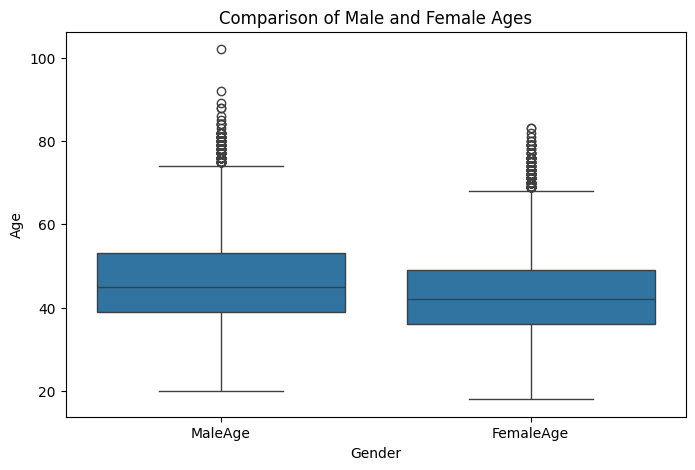

In [68]:
df_melted = dvos_data.melt(value_vars=['MaleAge', 'FemaleAge'], var_name='Gender', value_name='Age')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Age', data=df_melted)

plt.title('Comparison of Male and Female Ages')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

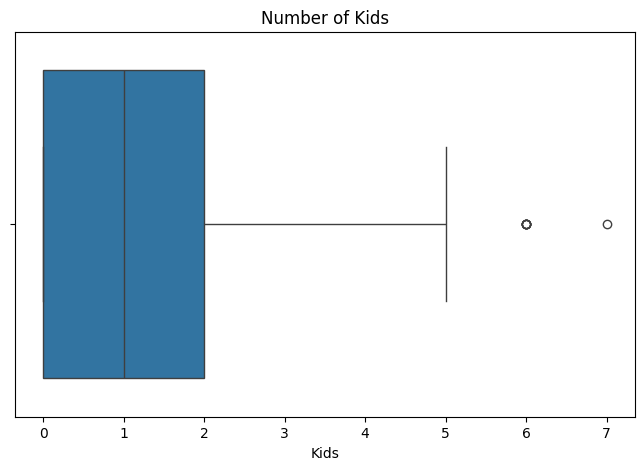

In [75]:
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=dvos_data['NoOfChildren'])

plt.title('Number of Kids')
plt.xlabel('Kids')

plt.show()

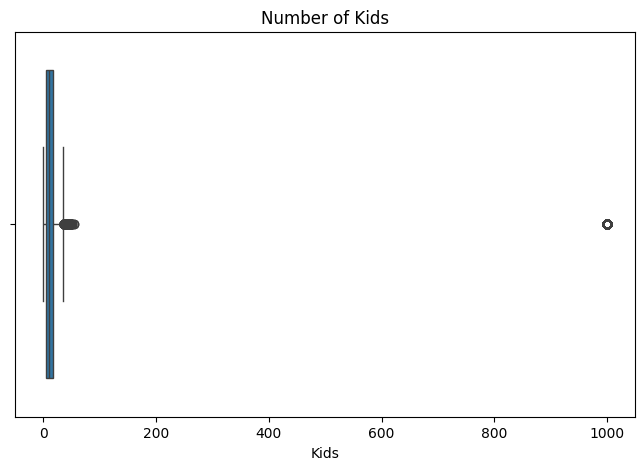

In [76]:
plt.figure(figsize=(8, 5)) 
sns.boxplot(x=dvos_data['DurationOfMarriage'])

plt.title('Number of Kids')
plt.xlabel('Kids')

plt.show()

In [77]:
dvos_data['DurationOfMarriage'].unique()

array([ 16,   1, 999,   2,   3,   0,   6,   8,   7,   4,   5,  11,  14,
        13,  12,   9,  10,  17,  15,  21,  18,  20,  19,  22,  25,  23,
        24,  26,  27,  28,  29,  31,  35,  30,  32,  34,  33,  36,  37,
        39,  41,  40,  38,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        52,  51,  55,  54])

### '999' must be a mistake
- will replace with NaN

In [79]:
dvos_data['DurationOfMarriage'] = dvos_data['DurationOfMarriage'].replace({999: np.nan})
dvos_data['DurationOfMarriage'].unique()

array([16.,  1., nan,  2.,  3.,  0.,  6.,  8.,  7.,  4.,  5., 11., 14.,
       13., 12.,  9., 10., 17., 15., 21., 18., 20., 19., 22., 25., 23.,
       24., 26., 27., 28., 29., 31., 35., 30., 32., 34., 33., 36., 37.,
       39., 41., 40., 38., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
       52., 51., 55., 54.])

In [91]:
dvos_data.head()

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,FemaleAge,SolemnisationCode,MarriagePropertySystem,NoOfChildren,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce,MarriageDate,DivorceDate
0,Gauteng,White,White,White,Unemployed,Unemployed,Female,Never married,Never married,1.0,...,40.0,Religious,In community of property,3,16.0,Unspecified,Unspecified,Unspecified,2006-12-12,2022-08-08
1,Western Cape,Coloured,Coloured,Coloured,"Professional, semi-professional and technical ...","Professional, semi-professional and technical ...",Both,Never married,Never married,1.0,...,27.0,Unspecified,In community of property,0,1.0,Civil union,Unspecified,Unspecified,2021-11-11,2022-05-05
2,Gauteng,Coloured,Coloured,Coloured,Unemployed,"Professional, semi-professional and technical ...",Male,Never married,Never married,1.0,...,44.0,DHA,Out of community of property,1,NaN,Civil union,No,Unspecified,2008-07-07,2022-07-07
3,Gauteng,Black African,Black African,Black African,Unemployed,Managers and administrators,Unspecified,Never married,Never married,1.0,...,30.0,DHA,In community of property,0,1.0,Civil union,No,Financial difficulties,2021-09-09,2022-01-01
4,Gauteng,Black African,Black African,Black African,Unemployed,Unemployed,Female,Never married,Never married,1.0,...,NaN,DHA,In community of property,0,NaN,Civil marriage,Unspecified,Unspecified,1989-10-10,2022-11-11
